## **Bellabeat Fitbit Fitness Tracker Case Study with Python**

# About Company

Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company

# Questions for the analysis
1.What are some trends in smart device usage?

2.How could these trends apply to Bellabeat customers?

3.How could these trends help influence Bellabeat marketing strategy

# Business task
Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

# **Loading Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make numbers easier to read
pd.options.display.float_format = '{:20.2f}'.format

# show all columns on output
pd.set_option('display.max_columns', 999)

Import datasets

In [2]:
df_activity = pd.read_csv('./data/dailyActivity_merged.csv')
df_calories= pd.read_csv('./data/hourlyCalories_merged.csv')
df_intensities = pd.read_csv('./data/hourlyIntensities_merged.csv')
df_sleep = pd.read_csv('./data/sleepDay_merged.csv')
df_weight = pd.read_csv('./data/weightLogInfo_merged.csv')

Exploring and summarizing data

In [6]:
df_activity.info()
df_activity.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00,940.00
mean,4855407369.33,7637.91,5.49,5.48,0.11,1.50,0.57,3.34,0.00,21.16,13.56,192.81,991.21,2303.61
std,2424805475.66,5087.15,3.92,3.91,0.62,2.66,0.88,2.04,0.01,32.84,19.99,109.17,301.27,718.17
min,1503960366.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2320127002.00,3789.75,2.62,2.62,0.00,0.00,0.00,1.95,0.00,0.00,0.00,127.00,729.75,1828.50
50%,4445114986.00,7405.50,5.24,5.24,0.00,0.21,0.24,3.36,0.00,4.00,6.00,199.00,1057.50,2134.00
75%,6962181067.00,10727.00,7.71,7.71,0.00,2.05,0.80,4.78,0.00,32.00,19.00,264.00,1229.50,2793.25
max,8877689391.00,36019.00,28.03,28.03,4.94,21.92,6.48,10.71,0.11,210.00,143.00,518.00,1440.00,4900.00


In [14]:
df_calories.info()
df_calories.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


,Id,ActivityHour,Calories
count,22099.00,22099,22099.00
unique,NaN,736,NaN
top,NaN,4/12/2016 9:00:00 PM,NaN
freq,NaN,33,NaN
mean,4848235270.22,NaN,97.39
std,2422500401.42,NaN,60.70
min,1503960366.00,NaN,42.00
25%,2320127002.00,NaN,63.00
50%,4445114986.00,NaN,83.00
75%,6962181067.00,NaN,108.00


In [10]:
df_calories.head(10)

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48
5,1503960366,4/12/2016 5:00:00 AM,48
6,1503960366,4/12/2016 6:00:00 AM,48
7,1503960366,4/12/2016 7:00:00 AM,47
8,1503960366,4/12/2016 8:00:00 AM,68
9,1503960366,4/12/2016 9:00:00 AM,141


In [15]:
df_intensities.info()
df_intensities.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


,Id,TotalIntensity,AverageIntensity
count,22099.00,22099.00,22099.00
mean,4848235270.22,12.04,0.20
std,2422500401.42,21.13,0.35
min,1503960366.00,0.00,0.00
25%,2320127002.00,0.00,0.00
50%,4445114986.00,3.00,0.05
75%,6962181067.00,16.00,0.27
max,8877689391.00,180.00,3.00


In [16]:
df_intensities.head(10)

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.33
1,1503960366,4/12/2016 1:00:00 AM,8,0.13
2,1503960366,4/12/2016 2:00:00 AM,7,0.12
3,1503960366,4/12/2016 3:00:00 AM,0,0.00
4,1503960366,4/12/2016 4:00:00 AM,0,0.00
5,1503960366,4/12/2016 5:00:00 AM,0,0.00
6,1503960366,4/12/2016 6:00:00 AM,0,0.00
7,1503960366,4/12/2016 7:00:00 AM,0,0.00
8,1503960366,4/12/2016 8:00:00 AM,13,0.22
9,1503960366,4/12/2016 9:00:00 AM,30,0.50


In [33]:
#sum of unique values
df_intensities['Id'].nunique()


33

In [27]:
df_activity['Id'].nunique()

33

In [28]:
df_calories['Id'].nunique()

33

In [30]:
df_sleep['Id'].nunique()

24

In [31]:
df_weight['Id'].nunique()

8

In [38]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [36]:
df_sleep.describe(include='all')

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.00,413,413.00,413.00,413.00
unique,NaN,31,NaN,NaN,NaN
top,NaN,4/15/2016 12:00:00 AM,NaN,NaN,NaN
freq,NaN,17,NaN,NaN,NaN
mean,5000979403.21,NaN,1.12,419.47,458.64
std,2060360173.74,NaN,0.35,118.34,127.10
min,1503960366.00,NaN,1.00,58.00,61.00
25%,3977333714.00,NaN,1.00,361.00,403.00
50%,4702921684.00,NaN,1.00,433.00,463.00
75%,6962181067.00,NaN,1.00,490.00,526.00


In [37]:
df_sleep.head(10)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
5,1503960366,4/19/2016 12:00:00 AM,1,304,320
6,1503960366,4/20/2016 12:00:00 AM,1,360,377
7,1503960366,4/21/2016 12:00:00 AM,1,325,364
8,1503960366,4/23/2016 12:00:00 AM,1,361,384
9,1503960366,4/24/2016 12:00:00 AM,1,430,449


In [39]:
df_weight.info()
df_weight.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
count,67.00,67,67.00,67.00,2.00,67.00,67,67.00
unique,NaN,56,NaN,NaN,NaN,NaN,2,NaN
top,NaN,5/2/2016 11:59:59 PM,NaN,NaN,NaN,NaN,True,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,41,NaN
mean,7009282134.66,NaN,72.04,158.81,23.50,25.19,NaN,1461771594283.58
std,1950321943.92,NaN,13.92,30.70,2.12,3.07,NaN,782994783.61
min,1503960366.00,NaN,52.60,115.96,22.00,21.45,NaN,1460443631000.00
25%,6962181067.00,NaN,61.40,135.36,22.75,23.96,NaN,1461079185000.00
50%,6962181067.00,NaN,62.50,137.79,23.50,24.39,NaN,1461801599000.00
75%,8877689391.00,NaN,85.05,187.50,24.25,25.56,NaN,1462375450500.00


Fixing Formatting

In [42]:
# Intensities DataFrame
df_intensities['ActivityHour'] = pd.to_datetime(df_intensities['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
df_intensities['time'] = df_intensities['ActivityHour'].dt.strftime('%H:%M:%S')  # Sadece saat formatı
df_intensities['date'] = df_intensities['ActivityHour'].dt.strftime('%m/%d/%y')  # Sadece tarih formatı

# Calories DataFrame
df_calories['ActivityHour'] = pd.to_datetime(df_calories['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
df_calories['time'] = df_calories['ActivityHour'].dt.strftime('%H:%M:%S')  # Sadece saat formatı
df_calories['date'] = df_calories['ActivityHour'].dt.strftime('%m/%d/%y')  # Sadece tarih formatı

# Activity DataFrame
df_activity['ActivityDate'] = pd.to_datetime(df_activity['ActivityDate'], format='%m/%d/%Y')
df_activity['date'] = df_activity['ActivityDate'].dt.strftime('%m/%d/%y')  # Sadece tarih formatı

# Sleep DataFrame
df_sleep['SleepDay'] = pd.to_datetime(df_sleep['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')
df_sleep['date'] = df_sleep['SleepDay'].dt.strftime('%m/%d/%y')  # Sadece tarih formatı


**Some interesting discoveries from this summary:**

Average sedentary time is 991 minutes or 16 hours. Definately needs to be reduced!

The majority of the participants are lightly active.

On the average, participants sleep 1 time for 7 hours.

Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps.

# Merging Data

In [44]:
merged_df = pd.merge(df_sleep, df_activity, on=['Id', 'date'], how='inner')

In [45]:
merged_df.head(10)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,1,327,346,04/12/16,2016-04-12,13162,8.50,8.50,0.00,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,2016-04-13,2,384,407,04/13/16,2016-04-13,10735,6.97,6.97,0.00,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,2016-04-15,1,412,442,04/15/16,2016-04-15,9762,6.28,6.28,0.00,2.14,1.26,2.83,0.00,29,34,209,726,1745
3,1503960366,2016-04-16,2,340,367,04/16/16,2016-04-16,12669,8.16,8.16,0.00,2.71,0.41,5.04,0.00,36,10,221,773,1863
4,1503960366,2016-04-17,1,700,712,04/17/16,2016-04-17,9705,6.48,6.48,0.00,3.19,0.78,2.51,0.00,38,20,164,539,1728
5,1503960366,2016-04-19,1,304,320,04/19/16,2016-04-19,15506,9.88,9.88,0.00,3.53,1.32,5.03,0.00,50,31,264,775,2035
6,1503960366,2016-04-20,1,360,377,04/20/16,2016-04-20,10544,6.68,6.68,0.00,1.96,0.48,4.24,0.00,28,12,205,818,1786
7,1503960366,2016-04-21,1,325,364,04/21/16,2016-04-21,9819,6.34,6.34,0.00,1.34,0.35,4.65,0.00,19,8,211,838,1775
8,1503960366,2016-04-23,1,361,384,04/23/16,2016-04-23,14371,9.04,9.04,0.00,2.81,0.87,5.36,0.00,41,21,262,732,1949
9,1503960366,2016-04-24,1,430,449,04/24/16,2016-04-24,10039,6.41,6.41,0.00,2.92,0.21,3.28,0.00,39,5,238,709,1788


# Visualization

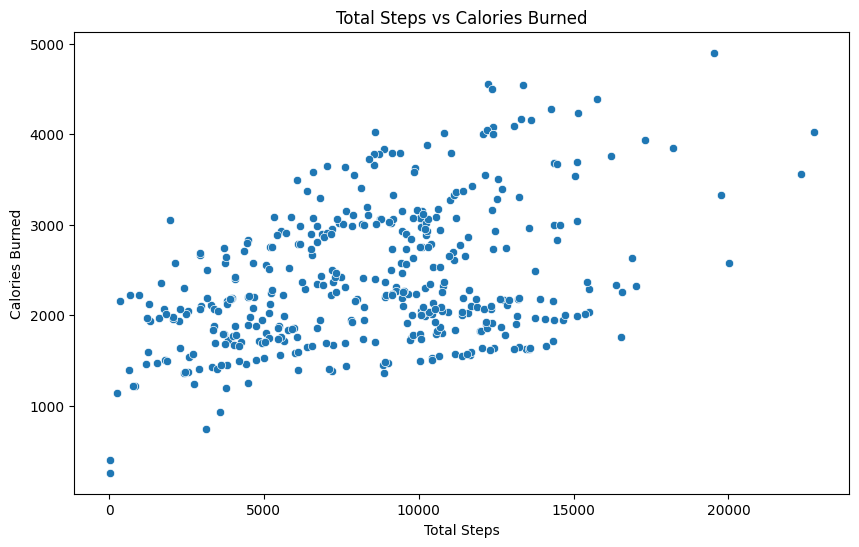

In [46]:
#Total steps vs Calories Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='Calories', data=merged_df)
plt.title('Total Steps vs Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.show()

Positive correlation here between Total Steps and Calories

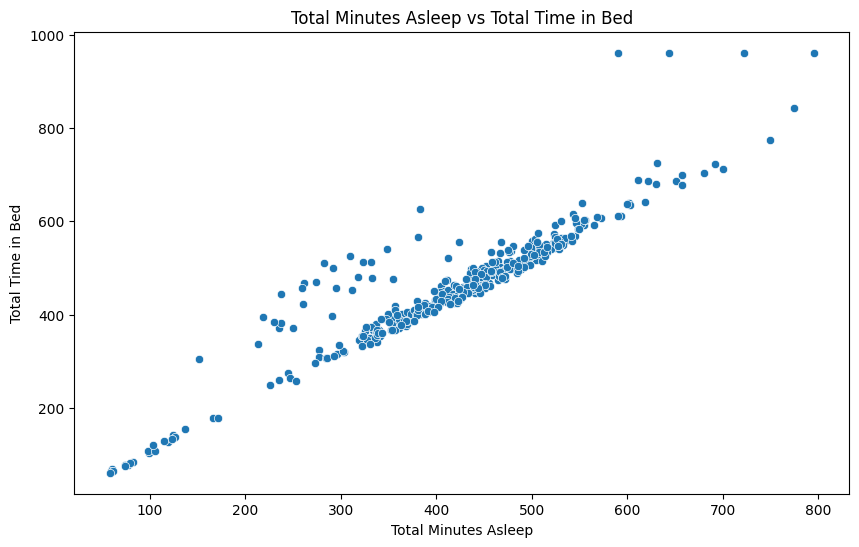

In [48]:
#Total Minutes Asleep vs Total Time in Bed
plt.figure(figsize=(10, 6))
sns.scatterplot(y='TotalTimeInBed', x='TotalMinutesAsleep', data=merged_df)
plt.title('Total Minutes Asleep vs Total Time in Bed')
plt.ylabel('Total Time in Bed')
plt.xlabel('Total Minutes Asleep')
plt.show()

The relationship between Total Minutes Asleep and Total Time in Bed looks linear

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


int_new = df_intensities.groupby('time', as_index=False).agg(mean_total_int=('TotalIntensity', 'mean')).dropna()



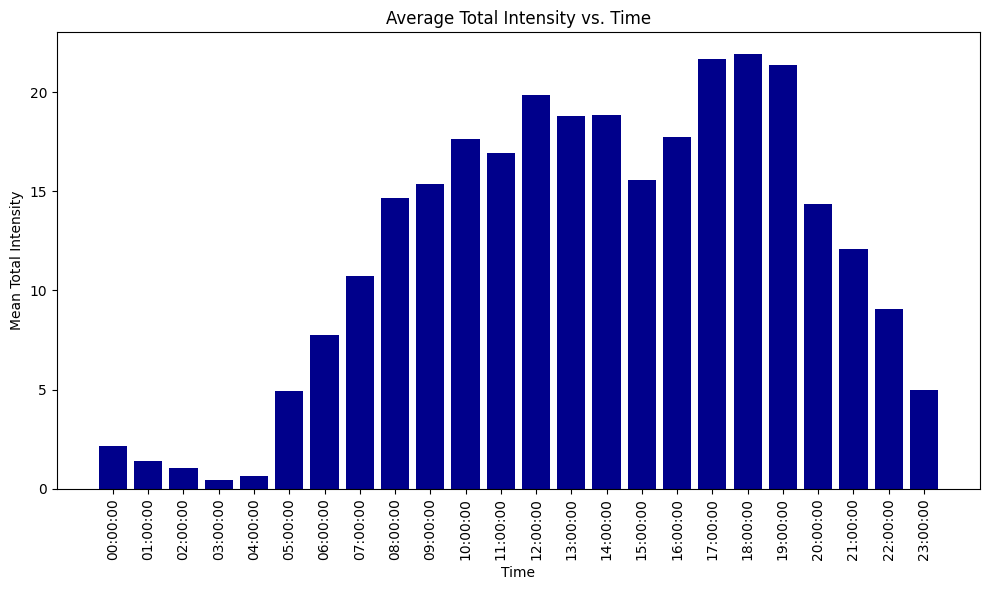

In [59]:
plt.figure(figsize=(10, 6))  # Grafiğin boyutu
plt.bar(int_new['time'], int_new['mean_total_int'], color='darkblue')  # Bar grafiği
plt.xticks(rotation=90)  # X eksenindeki etiketleri 90 derece döndürme
plt.title('Average Total Intensity vs. Time')  # Grafik başlığı
plt.xlabel('Time')  # X ekseni etiketi
plt.ylabel('Mean Total Intensity')  # Y ekseni etiketi
plt.tight_layout()  # Kenar boşluklarını düzenler
plt.show()

After visualizing Total Intensity hourly, I found out that people are more active between 5 am and 10pm.

Most activity happens between 5 pm and 7 pm - I suppose, that people go to a gym or for a walk after finishing work. We can use this time in the Bellabeat app to remind and motivate users to go for a run or walk.

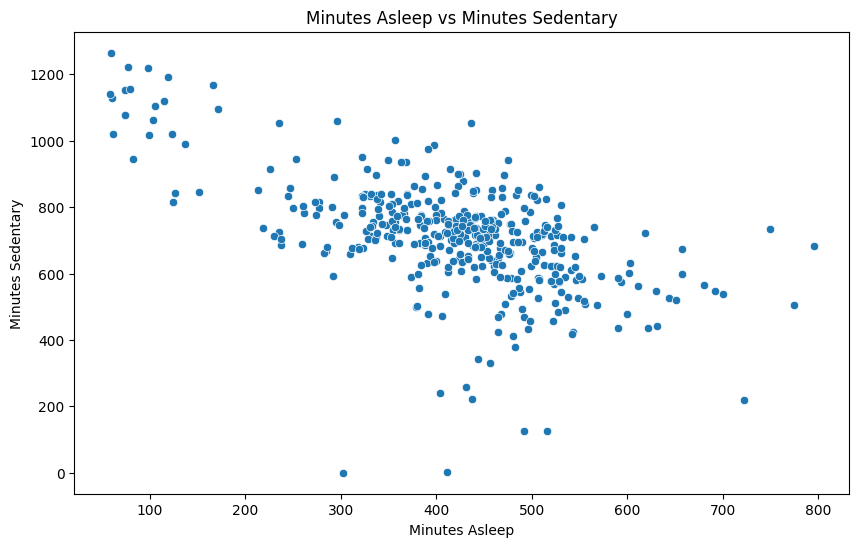

In [65]:
#Minutes Asleep vs Minutes Sedentary

plt.figure(figsize=(10, 6))
sns.scatterplot(y='SedentaryMinutes', x='TotalMinutesAsleep', data=merged_df)
plt.title('Minutes Asleep vs Minutes Sedentary')
plt.ylabel('Minutes Sedentary')
plt.xlabel('Minutes Asleep')
plt.show()


We can see the negative relationship between Sedentary Minutes and Sleep time

If Bellabeat users want to improve their sleep, Bellabeat app can send notifications for reducing sedentary time.

**# Target Audience**

The target audience consists of women who work full-time and are primarily engaged in sedentary activities during the day, such as working on the computer or attending meetings. Based on the intensity data, these women may engage in light physical activities to maintain some level of health. However, they could benefit from more frequent and structured activities to improve their well-being. They may also require additional knowledge on building healthy habits or finding the motivation to maintain an active lifestyle.

Since the dataset does not include gender-specific information, I assume that all genders are represented equally in the data.

# **Key Message for the Bellabeat Online Campaign**

The Bellabeat app is more than just a fitness tracker; it serves as a companion for women, helping them manage both their personal and professional lives while fostering healthy routines. Bellabeat supports this by offering daily personalized recommendations that motivate and educate users on how to achieve balance and maintain healthier habits.

# **Ideas for Enhancing the Bellabeat App**

**Encouraging Step Goals:** The average daily step count is 7,638, which is slightly below the threshold for significant health benefits, according to CDC research. The CDC indicates that taking 8,000 steps per day can lower the risk of all-cause mortality by 51%, and taking 12,000 steps per day can reduce this risk by 65% compared to taking 4,000 steps. Bellabeat could encourage users to aim for at least 8,000 steps daily by explaining the associated health benefits.

**Calorie Management for Weight Loss:** For users aiming to lose weight, controlling daily calorie intake is crucial. The Bellabeat app can provide low-calorie meal ideas for lunch and dinner to help users stay on track with their goals.

**Improving Sleep Habits:** To enhance sleep quality, Bellabeat could use notifications to remind users of their bedtime routine. Gentle reminders could guide users to wind down and prepare for sleep.

**Motivating Activity During Peak Times:** Most physical activity occurs between 5 PM and 7 PM, likely after work hours when users go for a walk or hit the gym. Bellabeat can leverage this time by sending motivational reminders to users, encouraging them to go for a run or a walk during this window.

**Reducing Sedentary Time for Better Sleep:** Another idea for improving sleep is to encourage users to reduce sedentary time. Bellabeat could integrate this recommendation into its daily activity reports, offering suggestions to stand or move more throughout the day, especially for users who are looking to enhance their sleep quality.